In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder

### Data Preparation

In [4]:
data = pd.ExcelFile('heart_disease.xlsx')
abr = pd.read_excel(data, 'Description')                         # Coloumn headers abbreviation sheet
df = pd.read_excel(data, 'Heart_disease')                        # Main dataframe sheet

In [5]:
print(abr)

         age                                       Age in years
0     Gender                       Gender ; Male - 1, Female -0
1         cp                                    Chest pain type
2   trestbps                             Resting blood pressure
3       chol                                cholesterol measure
4        fbs  (fasting blood sugar > 120 mg/dl) (1 = true; 0...
5    restecg  ecg observation at resting condition,   -- Val...
6     thalch                        maximum heart rate achieved
7      exang                            exercise induced angina
8    oldpeak  ST depression induced by exercise relative to ...
9      slope          the slope of the peak exercise ST segment
10      thal                                               Thal
11       num  target [0=no heart disease; 1,2,3,4 = stages o...


In [6]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [7]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [8]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [11]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,Male,asymptomatic,110,0,True,normal,92,False,0.0,flat,fixed defect,4
902,62,Male,asymptomatic,160,254,True,st-t abnormality,108,True,3.0,flat,normal,4
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4


In [12]:
df.duplicated().sum()

1

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,Male,asymptomatic,110,0,True,normal,92,False,0.0,flat,fixed defect,4
902,62,Male,asymptomatic,160,254,True,st-t abnormality,108,True,3.0,flat,normal,4
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4


In [15]:
# Labeling Data
df['cp'].unique()

array(['typical angina', 'atypical angina', 'asymptomatic', 'non-anginal'],
      dtype=object)

In [16]:
# Label encoding on Chest pain type data
lab_enc= LabelEncoder()
df['cp']= lab_enc.fit_transform(df[['cp']])
df

c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,3,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,1,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,0,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,3,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,0,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,Male,0,110,0,True,normal,92,False,0.0,flat,fixed defect,4
902,62,Male,0,160,254,True,st-t abnormality,108,True,3.0,flat,normal,4
903,53,Male,0,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,0,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4


In [17]:
df['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality'], dtype=object)

In [18]:
# Label encoding ecg observation
df['restecg']= lab_enc.fit_transform(df[['restecg']])
df

c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,3,145,233,True,0,150,False,2.3,downsloping,fixed defect,0
1,41,Male,1,135,203,False,1,132,False,0.0,flat,fixed defect,0
2,57,Male,0,140,192,False,1,148,False,0.4,flat,fixed defect,0
3,52,Male,3,118,186,False,0,190,False,0.0,flat,fixed defect,0
4,57,Male,0,110,201,False,1,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,Male,0,110,0,True,1,92,False,0.0,flat,fixed defect,4
902,62,Male,0,160,254,True,2,108,True,3.0,flat,normal,4
903,53,Male,0,125,0,False,1,120,False,1.5,upsloping,reversable defect,4
904,62,Male,0,166,170,False,2,120,True,3.0,flat,reversable defect,4


In [19]:
# Label encoding for slope and thal
df['slope']= lab_enc.fit_transform(df[['slope']])
df['thal']= lab_enc.fit_transform(df[['thal']])
df

c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,3,145,233,True,0,150,False,2.3,0,0,0
1,41,Male,1,135,203,False,1,132,False,0.0,1,0,0
2,57,Male,0,140,192,False,1,148,False,0.4,1,0,0
3,52,Male,3,118,186,False,0,190,False,0.0,1,0,0
4,57,Male,0,110,201,False,1,126,True,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,Male,0,110,0,True,1,92,False,0.0,1,0,4
902,62,Male,0,160,254,True,2,108,True,3.0,1,1,4
903,53,Male,0,125,0,False,1,120,False,1.5,2,2,4
904,62,Male,0,166,170,False,2,120,True,3.0,1,2,4


In [20]:
df['exang'].unique()

array([False, True, 'FALSE'], dtype=object)

In [21]:
df['sex'] = lab_enc.fit_transform(df[['sex']])
df['fbs'] = lab_enc.fit_transform(df[['fbs']])

c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
# For exang values
mapping = {'False':False, 'True':True, 'FALSE':False}
df['exang'] = df['exang'].map(mapping).fillna(df['exang'])
df['exang'].unique()

array([False,  True])

In [23]:
df['exang'] = lab_enc.fit_transform(df[['exang']])

c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
# Setting features and target
target = df[['num']]
features = df.drop('num', axis=1)
features

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,1,0,110,0,1,1,92,0,0.0,1,0
902,62,1,0,160,254,1,2,108,1,3.0,1,1
903,53,1,0,125,0,0,1,120,0,1.5,2,2
904,62,1,0,166,170,0,2,120,1,3.0,1,2


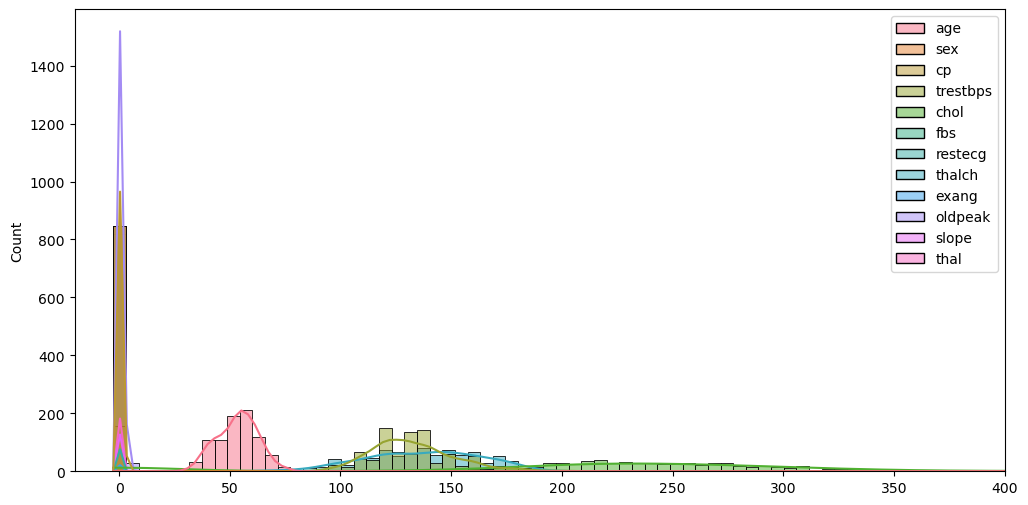

In [25]:
# Detecting outliers using visualization of distribution of features

plt.figure(figsize=(12,6))
sns.histplot(features, kde=True)
plt.xlim([-20, 400])
plt.show()

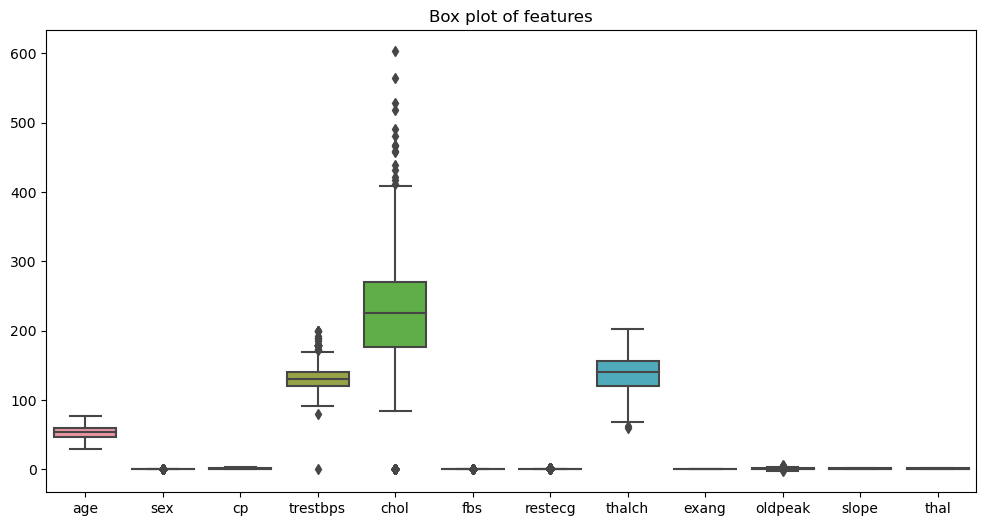

In [26]:
# box plot

plt.figure(figsize=(12,6))
sns.boxplot(data=features)
plt.title('Box plot of features')
plt.show()

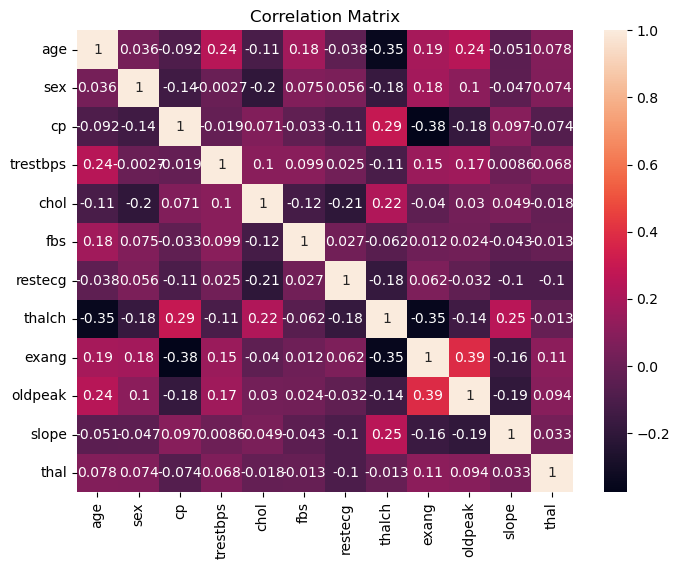

In [27]:
# Correlation matrices

corr = features.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [28]:
# Splitting into training and testing data

x_train,x_test,y_train,y_test = train_test_split(features,target,train_size=0.8,random_state=100)

### Decision Tree Classification

In [29]:
# Initiating decision tree model

dec_tree = DecisionTreeClassifier( criterion='gini', splitter='best', max_depth=3)

In [30]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [31]:
y_pred = dec_tree.predict(x_test)

In [32]:
# Checking accuracy score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.82      0.73        74
           1       0.49      0.52      0.50        60
           2       0.33      0.11      0.17        18
           3       0.38      0.21      0.27        14
           4       0.00      0.00      0.00         3

    accuracy                           0.57       169
   macro avg       0.37      0.33      0.34       169
weighted avg       0.53      0.57      0.54       169



c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
# ROC AUC score

from sklearn.metrics import roc_auc_score

y_pred_proba = dec_tree.predict_proba(x_test)
y_pred_proba

array([[0.24      , 0.2       , 0.32      , 0.24      , 0.        ],
       [0.08823529, 0.51176471, 0.18235294, 0.17647059, 0.04117647],
       [0.06521739, 0.2173913 , 0.23913043, 0.36956522, 0.10869565],
       [0.08823529, 0.51176471, 0.18235294, 0.17647059, 0.04117647],
       [0.06818182, 0.40909091, 0.29545455, 0.18181818, 0.04545455],
       [0.06818182, 0.40909091, 0.29545455, 0.18181818, 0.04545455],
       [0.50877193, 0.26315789, 0.10526316, 0.07017544, 0.05263158],
       [0.8625    , 0.10416667, 0.01666667, 0.01666667, 0.        ],
       [0.22222222, 0.77777778, 0.        , 0.        , 0.        ],
       [0.50877193, 0.26315789, 0.10526316, 0.07017544, 0.05263158],
       [0.8625    , 0.10416667, 0.01666667, 0.01666667, 0.        ],
       [0.8625    , 0.10416667, 0.01666667, 0.01666667, 0.        ],
       [0.8625    , 0.10416667, 0.01666667, 0.01666667, 0.        ],
       [0.08823529, 0.51176471, 0.18235294, 0.17647059, 0.04117647],
       [0.06521739, 0.2173913 , 0.

In [34]:
roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

0.6913069330126651

### Visualizing Decision Tree Structure

[Text(0.5, 0.875, 'x[2] <= 0.5\ngini = 0.69\nsamples = 676\nvalue = [304, 190, 82, 77, 23]'),
 Text(0.25, 0.625, 'x[8] <= 0.5\ngini = 0.742\nsamples = 374\nvalue = [79, 145, 67, 63, 20]'),
 Text(0.125, 0.375, 'x[4] <= 42.5\ngini = 0.721\nsamples = 158\nvalue = [61, 48, 25, 16, 8]'),
 Text(0.0625, 0.125, 'gini = 0.706\nsamples = 44\nvalue = [3, 18, 13, 8, 2]'),
 Text(0.1875, 0.125, 'gini = 0.653\nsamples = 114\nvalue = [58, 30, 12, 8, 6]'),
 Text(0.375, 0.375, 'x[0] <= 62.5\ngini = 0.703\nsamples = 216\nvalue = [18, 97, 42, 47, 12]'),
 Text(0.3125, 0.125, 'gini = 0.664\nsamples = 170\nvalue = [15, 87, 31, 30, 7]'),
 Text(0.4375, 0.125, 'gini = 0.743\nsamples = 46\nvalue = [3, 10, 11, 17, 5]'),
 Text(0.75, 0.625, 'x[4] <= 50.0\ngini = 0.418\nsamples = 302\nvalue = [225, 45, 15, 14, 3]'),
 Text(0.625, 0.375, 'x[3] <= 117.5\ngini = 0.734\nsamples = 34\nvalue = [8, 12, 8, 6, 0]'),
 Text(0.5625, 0.125, 'gini = 0.346\nsamples = 9\nvalue = [2, 7, 0, 0, 0]'),
 Text(0.6875, 0.125, 'gini = 0.742\

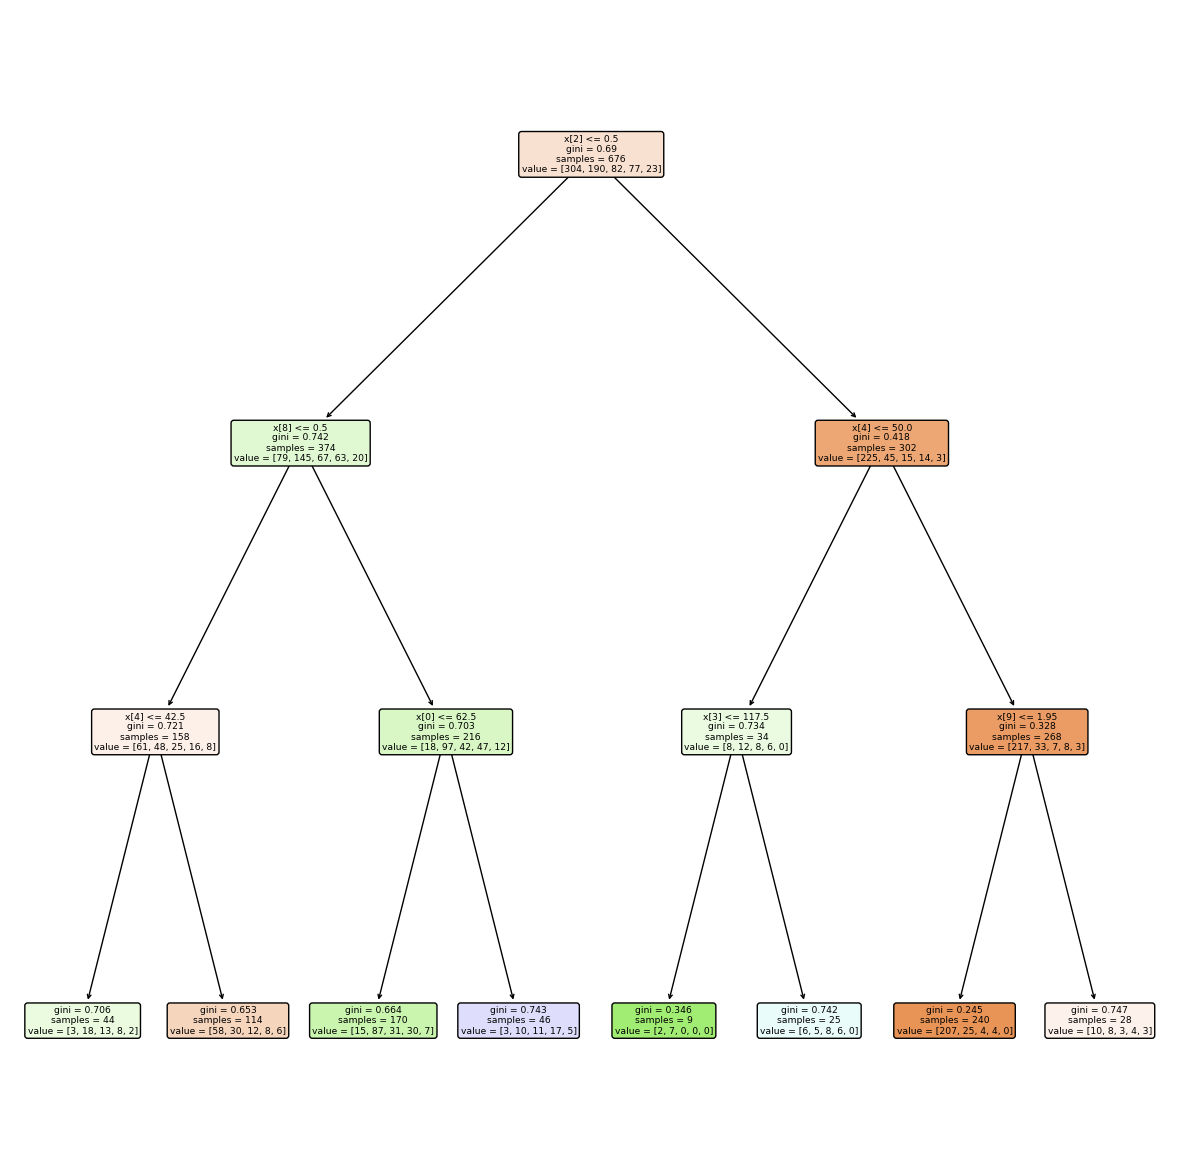

In [35]:
plt.figure(figsize=(15,15))
plot_tree(dec_tree, filled=True, rounded=True)

In [36]:
from sklearn import tree
print(tree.export_text(dec_tree))

|--- feature_2 <= 0.50
|   |--- feature_8 <= 0.50
|   |   |--- feature_4 <= 42.50
|   |   |   |--- class: 1
|   |   |--- feature_4 >  42.50
|   |   |   |--- class: 0
|   |--- feature_8 >  0.50
|   |   |--- feature_0 <= 62.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  62.50
|   |   |   |--- class: 3
|--- feature_2 >  0.50
|   |--- feature_4 <= 50.00
|   |   |--- feature_3 <= 117.50
|   |   |   |--- class: 1
|   |   |--- feature_3 >  117.50
|   |   |   |--- class: 2
|   |--- feature_4 >  50.00
|   |   |--- feature_9 <= 1.95
|   |   |   |--- class: 0
|   |   |--- feature_9 >  1.95
|   |   |   |--- class: 0



### Hyperpameter Tuning

In [37]:
params = {'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[1,2,3,4,5]}
grid_search = GridSearchCV(dec_tree,params,verbose=2)

In [38]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=2, 

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             verbose=2)

In [39]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'splitter': 'random'}